In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [ ]:
class Function:
    def __init__(self, f, min_x=0, max_x=1, genome_len=15): #O(1)
        self.f = f
        self.update_interval(min_x, max_x)
        self.decimal_places = genome_len
        self.population = None
        self.errors = np.array([])
        self.top_individuals = np.array([])
        self.fitness = None
        self.set_to_binary = False

    
    def f(self, x): #O(1)
        return self.f(x)


    def set_gene_representation(self, setting): #O(1)
        """
        Sets the genome representation to binary or decimal.
        """
        if setting == "binary": #O(1)
            self.set_to_binary = True
            print("Genome representation was changed to: Binary.")
        else: #O(1)
            self.set_to_binary = False
            print("Genome representation was changed to: Decimal.")


    def pre_plot(self, step=0.02): #O(rango_de_busqueda)
        x_axis = np.arange(self.min_x, self.max_x, step)
        y_axis = [self.f(num) for num in x_axis]
        plt.plot(x_axis, y_axis);

    def plot(self, step=0.02): #O(rango_de_busqueda)
        """
        Plots the evaluated function in the interval (self.min_x, self.max_x)
        with a step of 'step' value.
        """
        self.pre_plot(step) #O(rango_de_busqueda)
        plt.show();
        print("")
    

    def plot_population(self, step=0.02): #O(rango_de_busqueda) + O(population * decimal_places)
        """
        Plots the evaluated function in the interval (self.min_x, self.max_x)
        with a step of 'step' value and the evaluated population.
        """
        self.pre_plot(step) #O(rango_de_busqueda)
        if self.set_to_binary: #O(1)*[O(population)*[O(decimal_places)+O(1)]]
          for individual in self.population: #O(population)*[O(decimal_places)+O(1)]
              x = self.bin_to_float(individual) #O(decimal_places)
              y = self.f(x) #O(1)
              plt.plot(x, y, "x"); #O(1)
              plt.title("Population with binary genomes"); #O(1)
        else: #O(1)*[O(population)*[O(decimal_places)+O(1)]]
          for individual in self.population: #O(population)*[O(decimal_places)+O(1)]
              x = self.arr_to_float(individual) #O(decimal_places)
              y = self.f(x) #O(1)
              plt.plot(x, y, "x"); #O(1)
              plt.title("Population with decimal genomes"); #O(1)
        plt.show(); #O(1)
        print("") #O(1)


    def plot_avg_error_per_generation(self): #O(len(self.errors)) = O(generations)
        error_x_labels = np.arange(1, len(self.errors)+1, 1) #O(len(self.errors))
        plt.plot(error_x_labels, self.errors)
        plt.ylabel("Average error");
        plt.xlabel("Generation number");
        plt.title("Average error per generation");
        plt.show()
        print("")


    def plot_top_individuals(self, ideal_value=None, generations=0): #O(len(self.top_individuals)) = O(generations)
        """
        Plot the fittest individual per generation
        """
        top_x_labels = np.arange(1, len(self.top_individuals)+1, 1) #O(len(self.top_individuals))
        plt.plot(top_x_labels, self.top_individuals);
        if ideal_value != None:
            plt.axhline(y = ideal_value, linestyle = 'dashed', color = 'r', label = "Actual value");
        plt.ylabel("Fittest x value");
        plt.xlabel("Generation number");
        plt.title("Fittest individuals per generation");
        plt.legend();
        plt.show();
        print("")


    def set_genome_length(self, num): #O(1)
        """
        Sets genome length, for the decimal representation it is the number
        of decimal places in the array, and for the binary representation it 
        is the actual length of the array.
        """
        self.decimal_places = num


    def update_interval(self, min_x, max_x): #O(1)
        """
        Updates the values for self.min_x and self.max_x, between which the
        function is evalueated.
        """
        self.min_x = int(min_x)
        self.max_x = int(max_x)
        self.errors = np.array([])
        self.top_individuals = np.array([])


    def arr_to_float(self, arr): #O(decimal_places)
        """
        Turns an individual genome array decimal representation into a number.
        """
        num_integer_part = arr[0]*arr[1] #O(1)
        decimal_places = len(arr) - 2 #O(1)
        num = 0 #O(1)
        if arr[0] == -1: #O(1)*[O(decimal_places)]
            for i in range(-1, -decimal_places -1, -1): #O(decimal_places)
                num -= arr[i] * (10**(-i-1)) #O(1)
            num /= 10**(decimal_places) #O(1) 
        else: #O(1) * [O(decimal_places)]
            for i in range(-1, -decimal_places -1, -1): #O(decimal_places)
                num += arr[i] * (10**(-i-1)) #O(1)
            num /= 10**(decimal_places) #O(1)
        return num + num_integer_part #O(1)


    def bin_to_float(self, bin): #O(len(bin)) = O(decimal_places)
        """
        Turns an arrays binary representation of a genome into a number.
        """
        return ((self.max_x - self.min_x) * (np.sum(bin)/len(bin))) + self.min_x


    def get_rand_arr(self): #O(decimal_places)
        """
        Generates a random array representation of an individual.
        The array represents a number ranging from self.min_x to self.max_x.
        The first two spaces of the array represent the sign and integer part
        of the number, while the following self.decimal_places spaces of the 
        array represent the decimal places.
        """
        arr = [random.randint(0, 9) for i in range(self.decimal_places + 2)] #O(decimal_places)
        arr[0] = 1 #O(1)
        if self.min_x < 0: #O(1)
            if self.max_x < 0: #O(1)
                rand_int = random.randint(self.min_x + 1, self.max_x) #O(1)
            elif self.max_x > 0: #O(1)
                rand_int = random.randint(self.min_x + 1, self.max_x) #O(1)
                if rand_int == self.max_x: #O(1)
                    rand_int = 0
                    arr[0] = -1
            else: #O(1)
                rand_int = random.randint(self.min_x + 1, self.max_x) #O(1)
                arr[0] = -1
        else: #O(1)
            rand_int = random.randint(self.min_x, self.max_x - 1) #O(1)
        arr[1] = abs(rand_int) #O(1)
        if arr[1] != 0: #O(1)
            arr[0] = rand_int/abs(rand_int) #O(1)
        return arr
    

    def get_rand_bin(self): #O(decimal_places)
        """
        Returns a random binary array representation for a genome.
        """
        bin_arr = [0]*self.decimal_places #O(decimal_places)
        p = random.uniform(0,1) #O(1)
        for i in range(self.decimal_places): #O(decimal_places)
            throw = random.uniform(0,1) #O(1)
            if throw < p: #O(1)
                bin_arr[i] = 1 #O(1)
        return bin_arr #O(1)


    def generate_population(self, num): #O(num)
        """
        Generates a population of num individuals with the set genome 
        representation.
        """
        if self.set_to_binary: #O(num)
            self.population = [self.get_rand_bin() for i in range(num)] #O(num)
        else:
            self.population = [self.get_rand_arr() for i in range(num)] #O(num)
        self.set_population_fitness() #O(self.population) = O(num)


    def set_population_fitness(self): #O(self.population)
        """
        """
        unnormalized_fitness = None #O(1)
        if self.set_to_binary: #O(self.population)
            unnormalized_fitness = np.array([self.f(self.bin_to_float(x)) for x in self.population]) #O(self.population)
        else:
            unnormalized_fitness = np.array([self.f(self.arr_to_float(x)) for x in self.population]) #O(self.population)

        min_element = np.min(unnormalized_fitness) #O(self.population)
        if min_element < 0: #O(1) 
            unnormalized_fitness = unnormalized_fitness - min_element #O(1)
        unnormalized_fitness = (unnormalized_fitness + 1) #O(1)
        self.fitness = unnormalized_fitness/unnormalized_fitness.sum() #O(self.population)
    
    
    def get_next_generation(self): #O(population_size)*O(decimal_places)
        """
        """
        population_size = len(self.population) #O(1)
        offspring = [None]*((population_size//2)*2)  #O(population_size)

        if self.set_to_binary:
            for i in range(population_size//2): #O(population_size)*O(decimal_places)
                parents = np.random.choice(population_size, 2, p=self.fitness) #O(1)
                crosspoint = random.randint(0, self.decimal_places-1) #O(1)
                child1 = [0]*(self.decimal_places) #O(decimal_places)
                child2 = [0]*(self.decimal_places) #O(decimal_places)
                for j in range(crosspoint): #O(decimal_places)
                    child1[j] = self.population[parents[0]][j]
                    child2[j] = self.population[parents[1]][j]
                for j in range(crosspoint, self.decimal_places): #O(decimal_places)
                    child1[j] = self.population[parents[1]][j]
                    child2[j] = self.population[parents[0]][j]
                offspring[i*2] = child1
                offspring[i*2+1] = child2
                
        else: #O(population_size)*O(decimal_places)
            genome_size = self.decimal_places + 2 #O(1)
            for i in range(population_size//2): #O(population_size)*O(decimal_places)
                parents = np.random.choice(population_size, 2, p=self.fitness)
                crosspoint = random.randint(2, genome_size - 1)
                child1 = [0]*(genome_size) #O(decimal_places)
                child2 = [0]*(genome_size) #O(decimal_places)
                for j in range(crosspoint): #O(decimal_places)
                    child1[j] = self.population[parents[0]][j]
                    child2[j] = self.population[parents[1]][j]
                for j in range(crosspoint, genome_size): #O(decimal_places)
                    child1[j] = self.population[parents[1]][j]
                    child2[j] = self.population[parents[0]][j]
                offspring[i*2] = child1
                offspring[i*2+1] = child2
        self.population = offspring
        self.set_population_fitness()
               

    def mutate(self, p=0.005): #O(self.population)*O(decimal_places)
        """
        """
        if self.set_to_binary: #O(self.population)*O(dedcimal_places)
            for individual in self.population: #O(self.population)*O(dedcimal_places)    
                rand_bin = random.randint(0, 1) #O(1)
                for gene_index in range(self.decimal_places): #O(decimal_places)
                    if rand_bin==individual[gene_index] and random.uniform(0, 1) < p: #O(1)
                        individual[gene_index] = abs(rand_bin-1)
        else: #O(population)*O(decimal_places)
            for individual in self.population: #O(population)*O(decimal_places)
                for gene_index in range(2, self.decimal_places): #O(decimal_places)
                    if random.uniform(0, 1) < p:
                        individual[gene_index] = random.randint(0, 9)
    

    def calculate_avg_error(self, ideal_value): #O(population)
        """
        """
        if self.set_to_binary: #O(population)
            errors = np.absolute(np.array([self.bin_to_float(x) for x in self.population]) - ideal_value) #O(population)
        else: #O(population)
            errors = np.absolute(np.array([self.arr_to_float(x) for x in self.population]) - ideal_value) #O(population)
        avg_error = errors.mean()
        self.errors = np.append(self.errors, avg_error)


    def get_top_individual(self): #O(self.fitness) = O(population)
        """
        """
        if self.set_to_binary:
            return self.bin_to_float(self.population[np.where(self.fitness == self.fitness.max())[0][0]])
        return self.arr_to_float(self.population[np.where(self.fitness == self.fitness.max())[0][0]])


    def simulate_maximum(self, generations, population_size, mutation_p, genome_size, min_x, max_x, do_plot=False, known_max=None, step=0.02):
        """
        Module the different generations live in order.
        """
        self.update_interval(min_x, max_x) #O(1)
        self.set_genome_length(genome_size) #O(1)

        self.generate_population(population_size) #O(population)
        self.top_individuals = np.append(self.top_individuals, 
                                         self.get_top_individual()) #O(population)
        if do_plot: #O(1)
            self.plot_population(step)
        if known_max != None:
            self.calculate_avg_error(known_max) #O(population)
            for generation in range(generations):
              #O(generations)*(O(population_size)*O(decimal_places)+O(population)*O(decimal_places))
                self.get_next_generation() #O(population_size)*O(decimal_places)
                self.mutate(mutation_p) #O(self.population)*O(decimal_places)
                self.calculate_avg_error(known_max) #O(population)
                self.top_individuals = np.append(self.top_individuals, 
                                                 self.get_top_individual()) #O(population)
        else:
            for generation in range(generations):
              #O(generations)*(O(population_size)*O(decimal_places)+O(population)*O(decimal_places))
                self.get_next_generation() #O(population_size)*O(decimal_places)
                self.mutate(mutation_p) #O(self.population)*O(dedcimal_places)
                self.top_individuals = np.append(self.top_individuals, 
                                                 self.get_top_individual()) #O(population)

        if do_plot: #O(rango_de_busqueda)
            self.plot_population(step)
        

        if known_max != None:
            self.plot_avg_error_per_generation()
            self.plot_top_individuals(known_max)
        else:
            self.plot_top_individuals()


##Conclusion



*   Teniendo en cuenta que el método principal de la clase Function es _simulate_maximum_, el tiempo computacional ocupado por la clase Function para encontrar optimos locales utilizando una adaptación del método genético visto en clase es de:

  $O(population)+O(generations)*(O(population\_size)*O(decimal\_places)+O(population)*O(decimal\_places)) = O(generation*population\_size*decimal\_places)$


*   Cuando nos enfocamos en acelerar la convergencia, destaca la influencia de 2 parámetros específicos: el primero de ellos es la generación de la población inicial, ya que aunque habitualmente esta se genera escogiendo números al azar, existen trabajos sobre que es lo que sucedería si los individuos de la población inicial se obtuviesen como resultado de alguna técnica heurística o de optimización local, hallando que puede acelerar la convergencia del Algoritmo Genético. 
  
  Por otro lado, es clara también la importancia de la probabilidad de mutación, pues se encarga de asegurar que ningún punto del espacio de búsqueda tenga probabilidad cero de ser examinado, lo que tiene una gran importancia para asegurar la convergencia del Algoritmo.



# Test 1

Genome representation was changed to: Decimal.


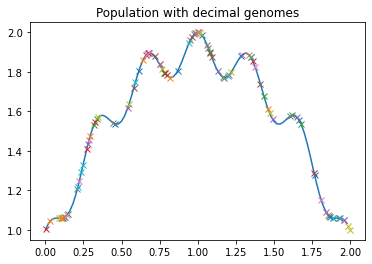

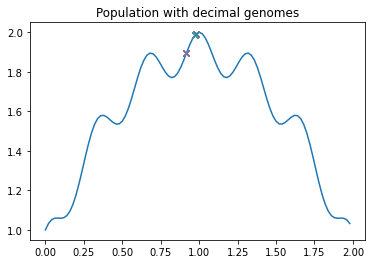

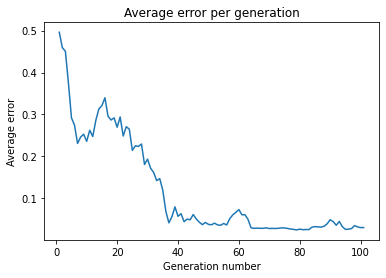

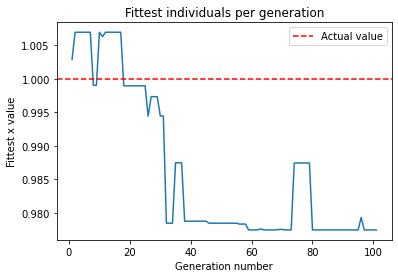


Genome representation was changed to: Binary.


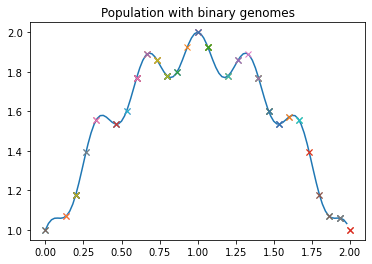

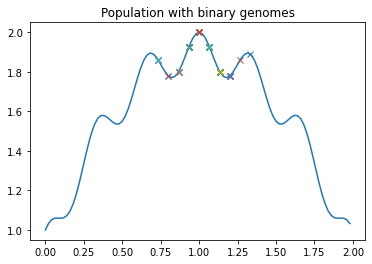

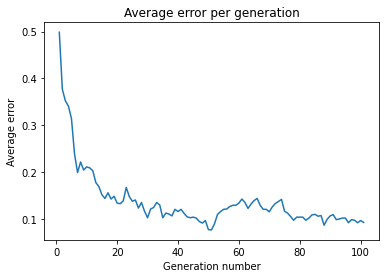

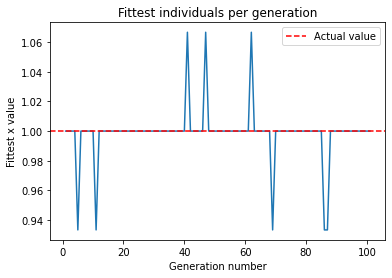

In [ ]:
f = Function(lambda x: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2)

f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=15, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1)

f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=30, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1)

# Test 2

Genome representation was changed to: Decimal.


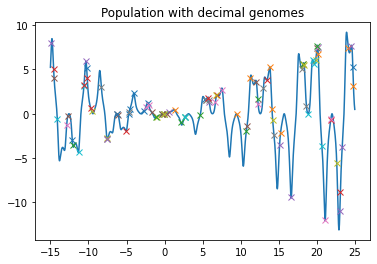

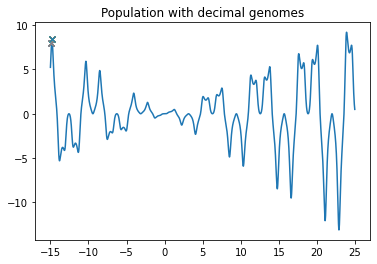

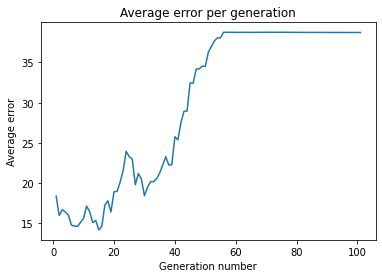

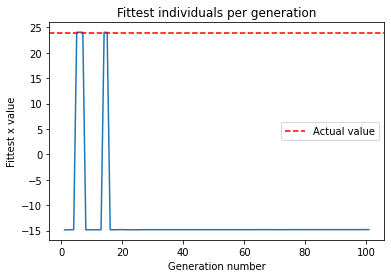

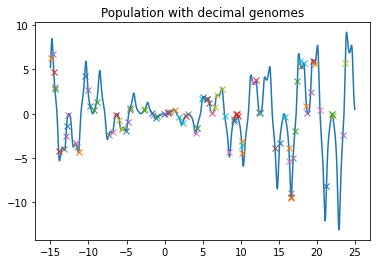

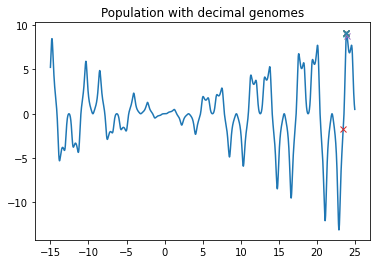

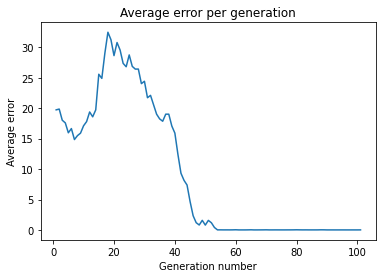

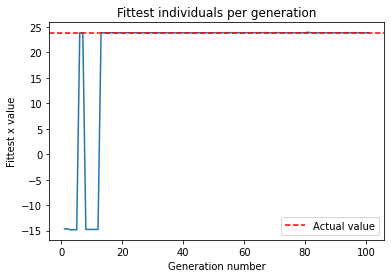


Genome representation was changed to: Binary.


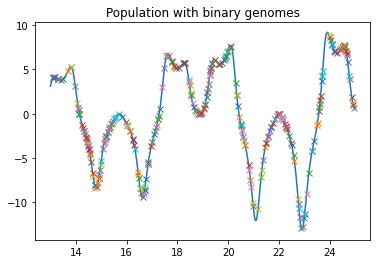

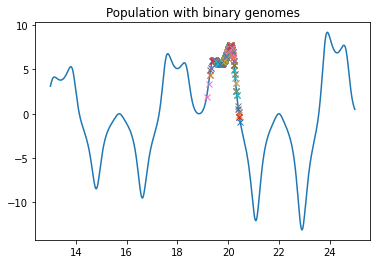

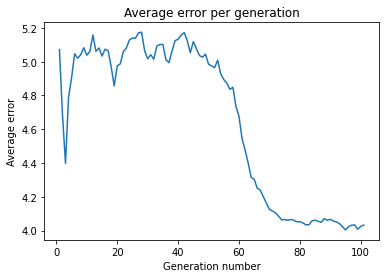

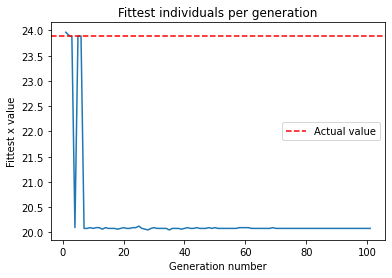

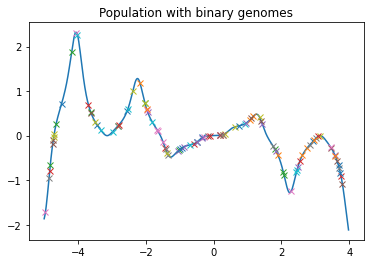

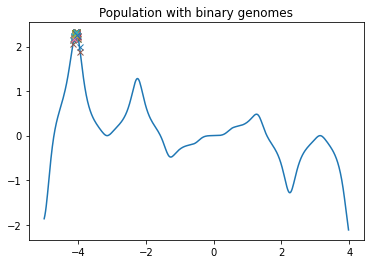

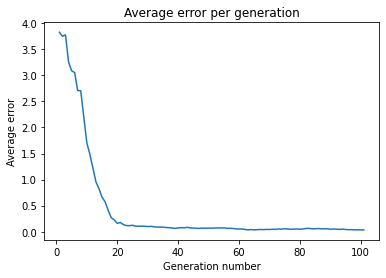

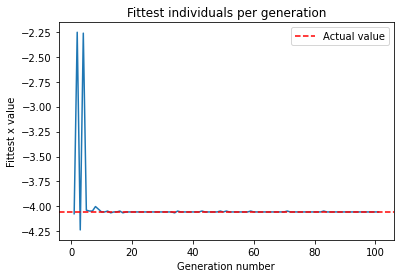

In [ ]:
f = Function(lambda x: math.cos(x) * (3*x*(math.sin(x)**2)) / (math.cos(7*x)+3))

f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=15, 
                   min_x=-15, 
                   max_x=25, 
                   do_plot=True,
                   known_max=23.9004438301626)

f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=15, 
                   min_x=-15, 
                   max_x=25, 
                   do_plot=True,
                   known_max=23.9004438301626)


f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=300, 
                   mutation_p=0, 
                   genome_size=800, 
                   min_x=13, 
                   max_x=25, 
                   do_plot=True,
                   known_max=23.9004438301626)

f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.0001, 
                   genome_size=1000, 
                   min_x=-5, 
                   max_x=4, 
                   do_plot=True,
                   known_max=-4.0586587159619)

# Test 3

Genome representation was changed to: Decimal.


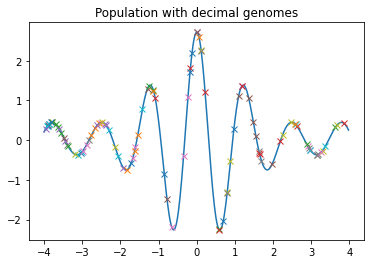

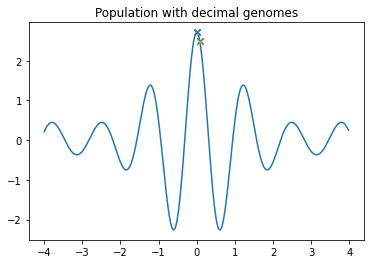

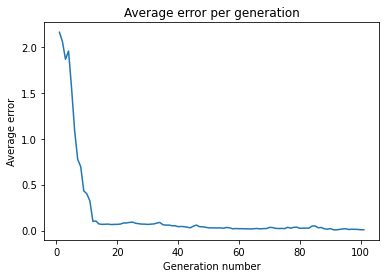

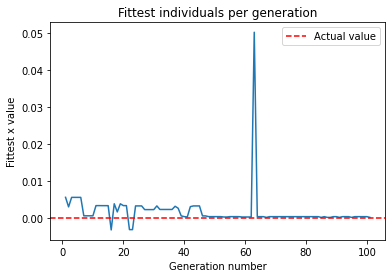


Genome representation was changed to: Binary.


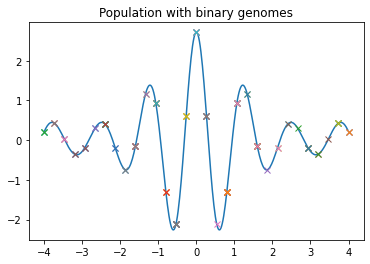

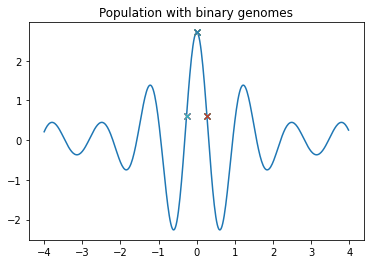

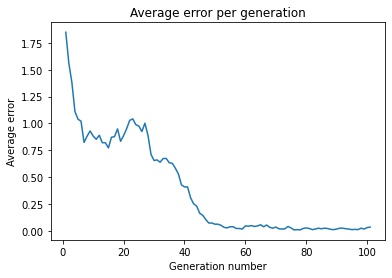

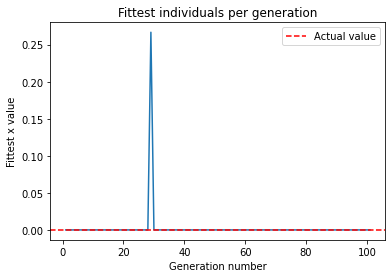

In [ ]:
f = Function(lambda x: (math.cos(5*x)*math.exp(math.cos(x))))

f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=15, 
                   min_x=-4, 
                   max_x=4, 
                   do_plot=True,
                   known_max=0)

f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=30, 
                   min_x=-4, 
                   max_x=4, 
                   do_plot=True,
                   known_max=0)

# Test 4

Genome representation was changed to: Decimal.


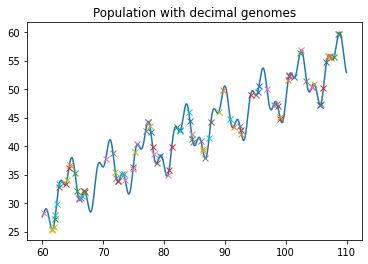

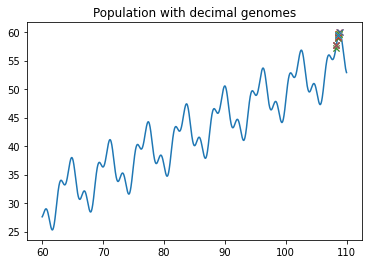

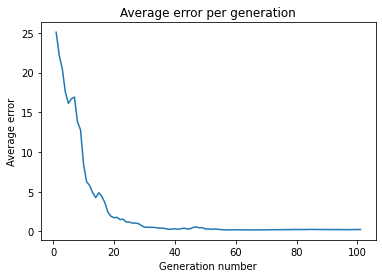

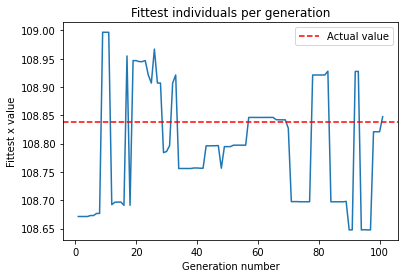


Genome representation was changed to: Binary.


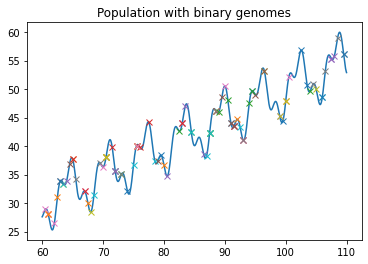

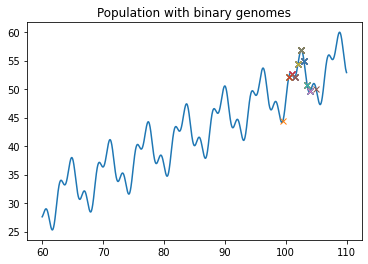

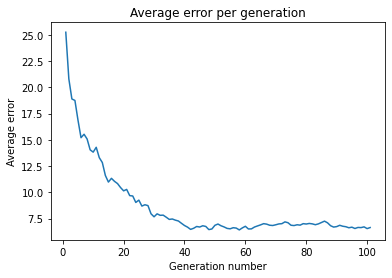

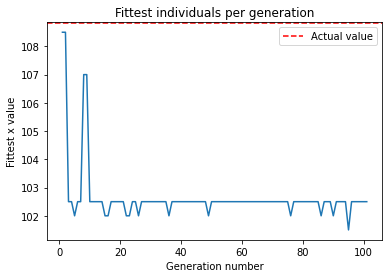

In [ ]:
f = Function(lambda x: (x/2) + (4*math.sin(x)) + (2*math.cos(3*x)))

f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=15, 
                   min_x=60, 
                   max_x=110, 
                   do_plot=True,
                   known_max=108.8384485060933)

f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=100, 
                   min_x=60, 
                   max_x=110, 
                   do_plot=True,
                   known_max=108.8384485060933)

# Test 5

Genome representation was changed to: Decimal.


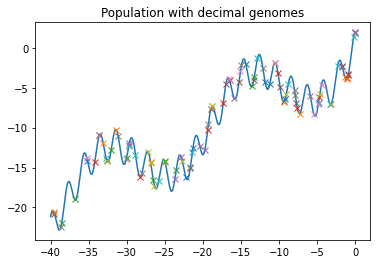

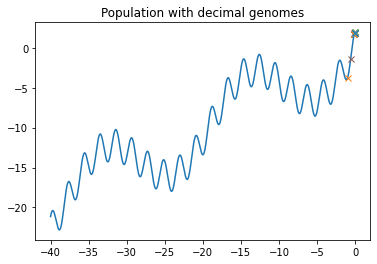

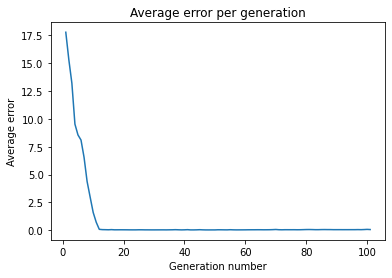

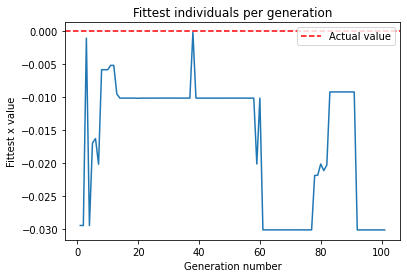


Genome representation was changed to: Binary.


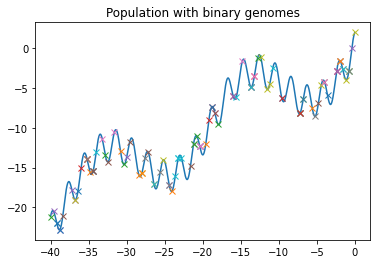

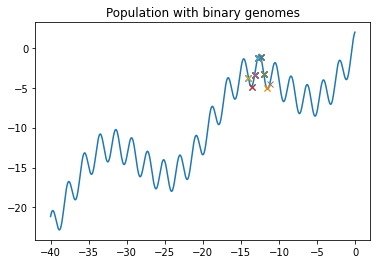

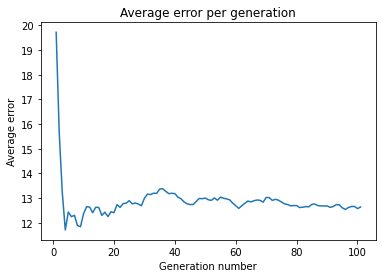

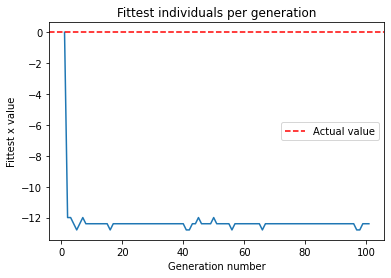

In [ ]:
f = Function(lambda x: (x/2) + (4*math.sin(x/3)) + (2*math.cos(3*x)))

f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=15, 
                   min_x=-40, 
                   max_x=0, 
                   do_plot=True,
                   known_max=0)

f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=100, 
                   min_x=-40, 
                   max_x=0, 
                   do_plot=True,
                   known_max=0)

# Test 6

Genome representation was changed to: Decimal.


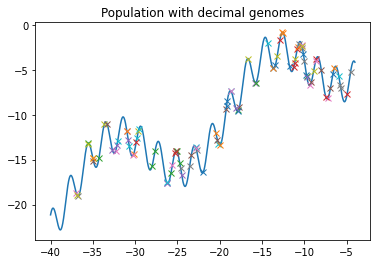

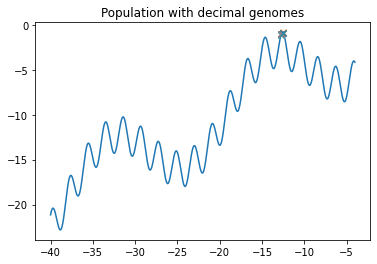

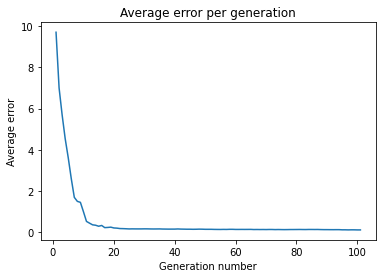

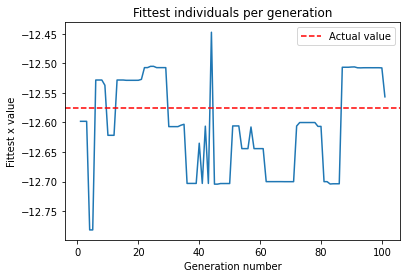


Genome representation was changed to: Binary.


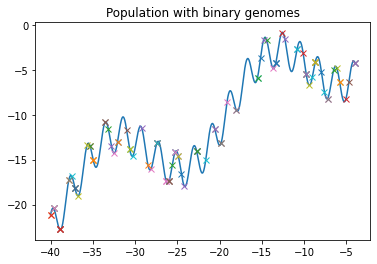

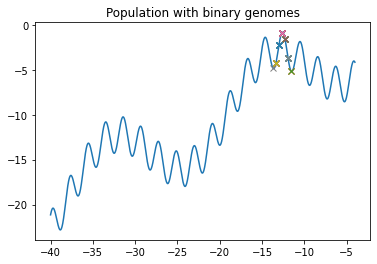

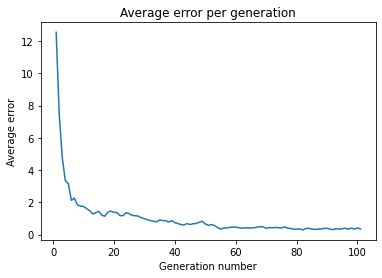

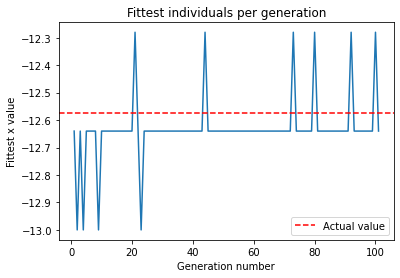

In [ ]:
f = Function(lambda x: (x/2) + (4*math.sin(x/3)) + (2*math.cos(3*x)))

f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=15, 
                   min_x=-40, 
                   max_x=-4, 
                   do_plot=True,
                   known_max=-12.5754369627612)

f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=100, 
                   min_x=-40, 
                   max_x=-4, 
                   do_plot=True,
                   known_max=-12.5754369627612)

# Test 7

Genome representation was changed to: Decimal.


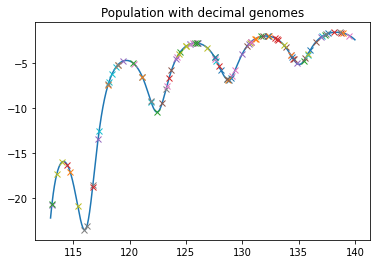

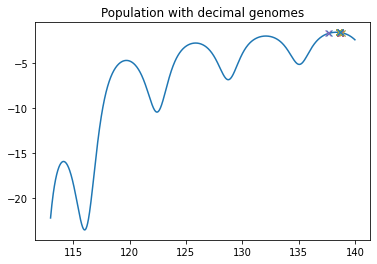

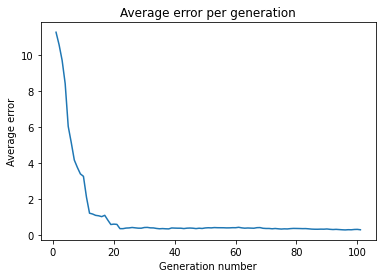

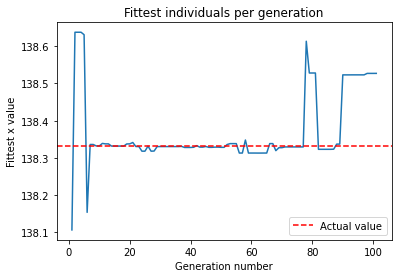


Genome representation was changed to: Binary.


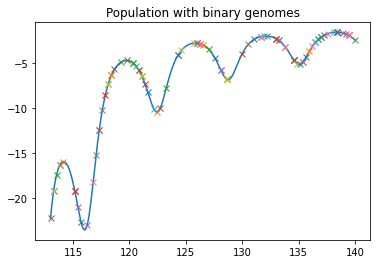

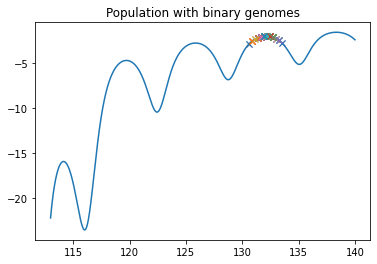

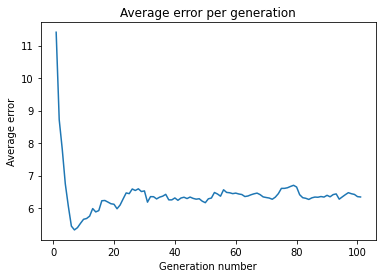

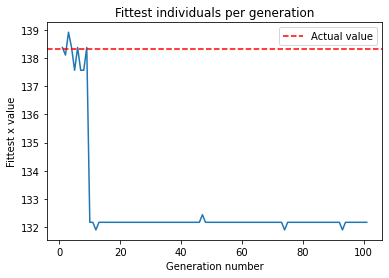

In [ ]:
f = Function(lambda x: (math.tan(math.log(x)))/(math.cos(x) + 2))


f.set_gene_representation("decimal")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=15, 
                   min_x=113, 
                   max_x=140, 
                   do_plot=True,
                   known_max=138.3331009112809)

f.set_gene_representation("binary")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.001, 
                   genome_size=100, 
                   min_x=113, 
                   max_x=140, 
                   do_plot=True,
                   known_max=138.3331009112809)

#Test 8 - Varying frequencies

Genome representation was changed to: Decimal.
Population Size: 100
Genome size: 15
Generations amount: 100


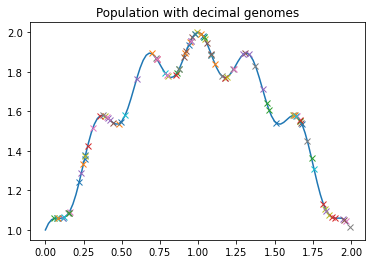

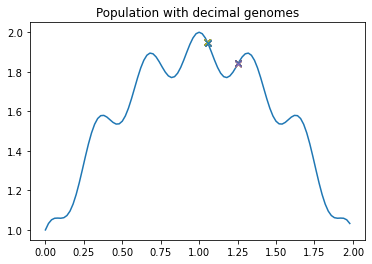

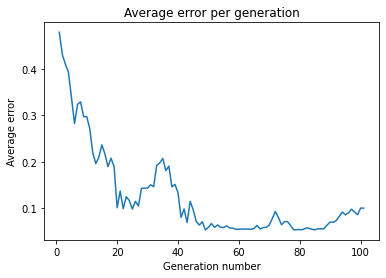

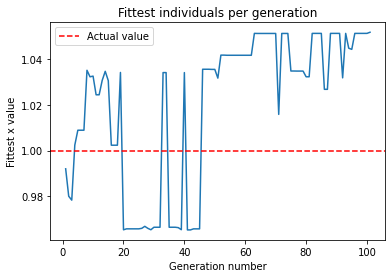


Genome representation was changed to: Binary.
Population Size: 100
Genome size: 30
Generations amount: 100


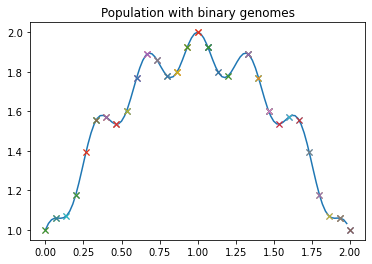

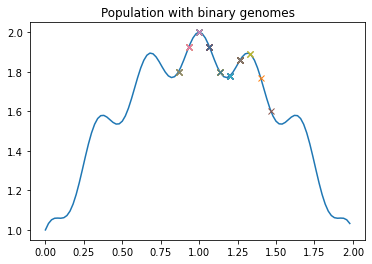

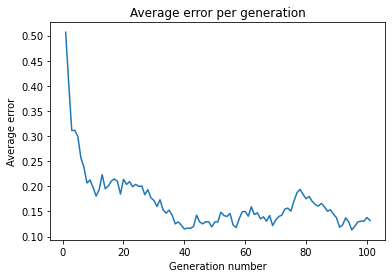

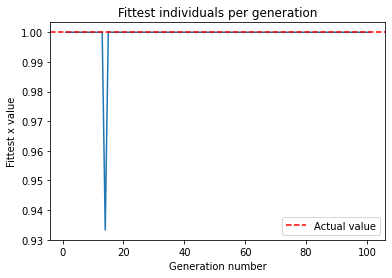


Genome representation was changed to: Decimal.
Population Size: 100
Genome size: 15
Generations amount: 100


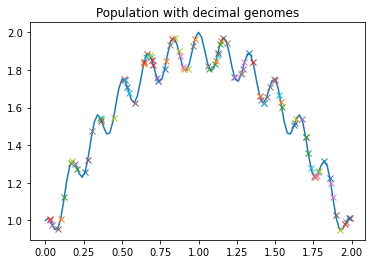

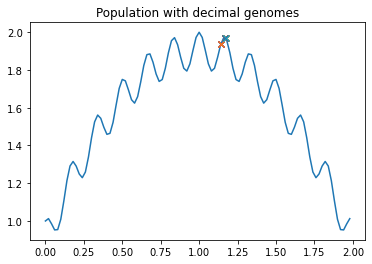

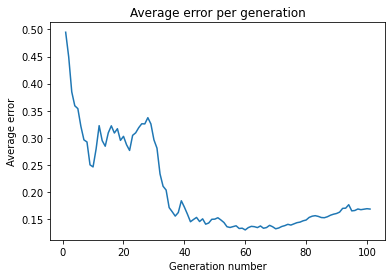

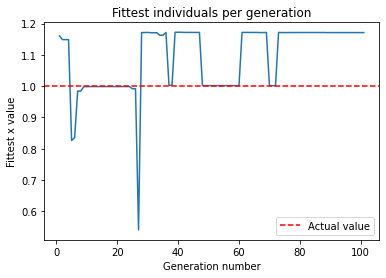


Genome representation was changed to: Binary.
Population Size: 100
Genome size: 30
Generations amount: 100


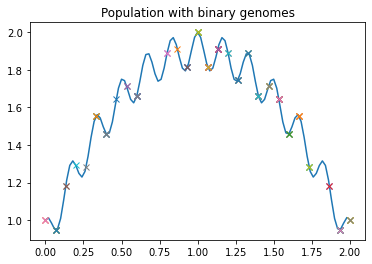

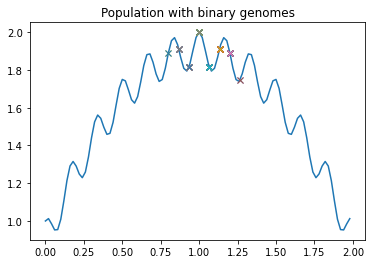

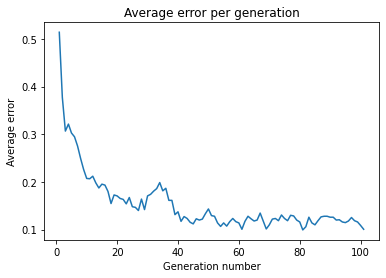

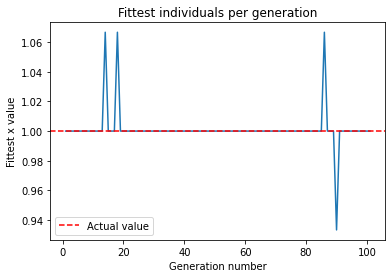


Genome representation was changed to: Decimal.
Population Size: 100
Genome size: 15
Generations amount: 100


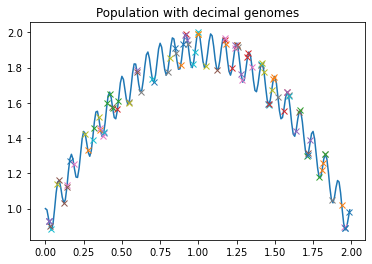

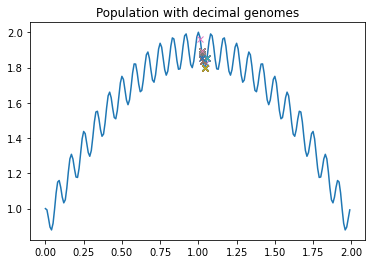

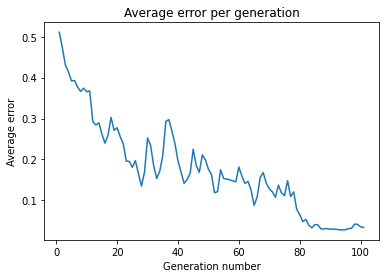

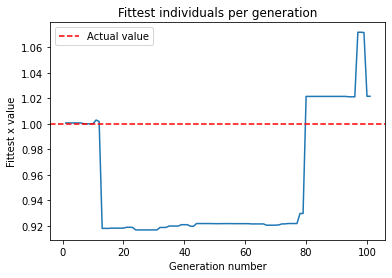


Genome representation was changed to: Binary.
Population Size: 100
Genome size: 30
Generations amount: 100


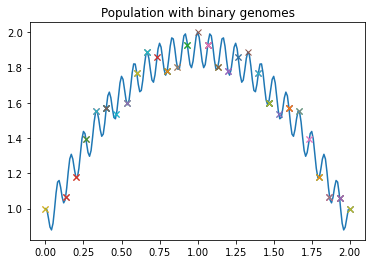

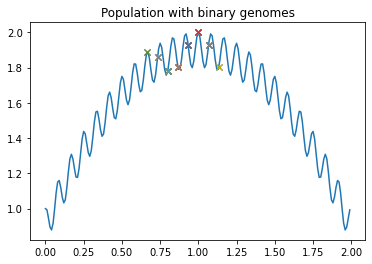

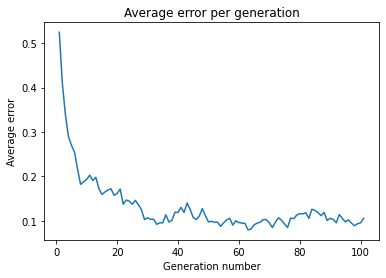

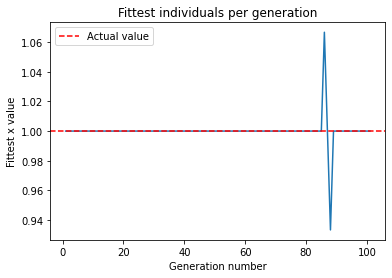


Genome representation was changed to: Decimal.
Population Size: 100
Genome size: 10
Generations amount: 100


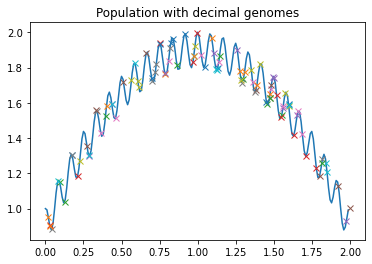

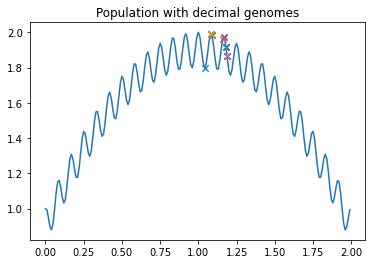

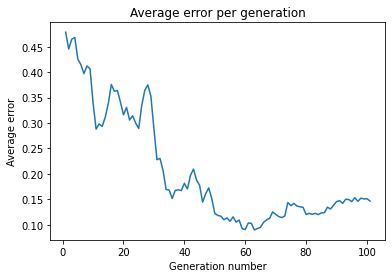

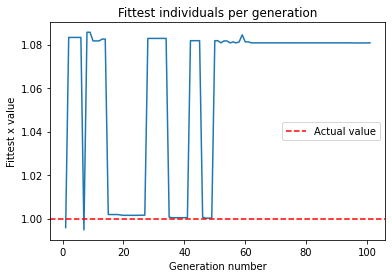


Genome representation was changed to: Binary.
Population Size: 100
Genome size: 100
Generations amount: 100


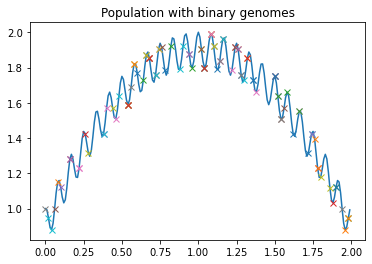

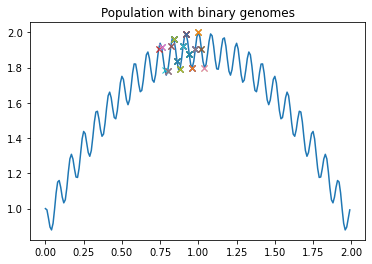

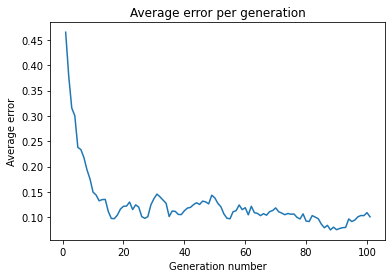

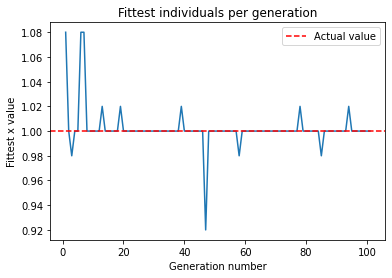


Genome representation was changed to: Decimal.
Population Size: 100
Genome size: 10
Generations amount: 100
Increased Mutability (0.005)


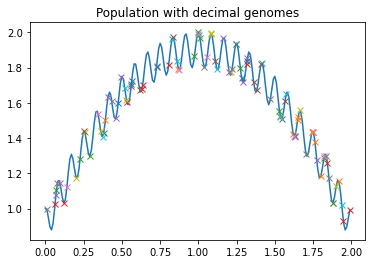

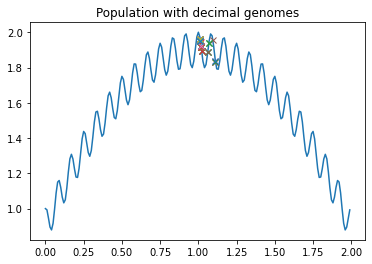

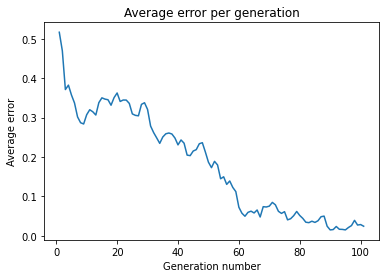

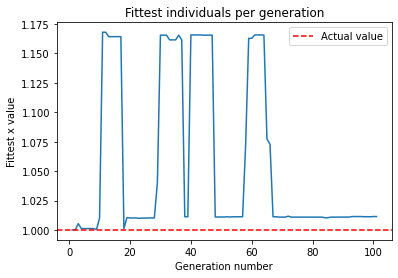


Population Size: 100
Genome size: 10
Generations amount: 100
Increased Mutability (0.01)


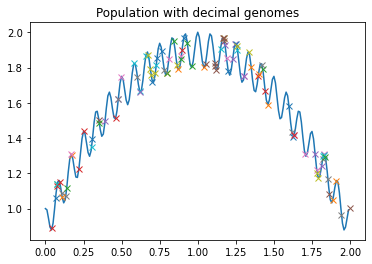

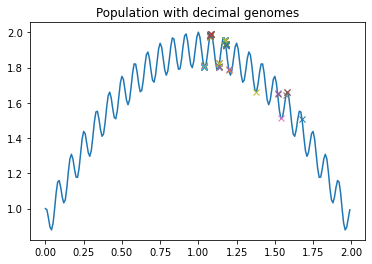

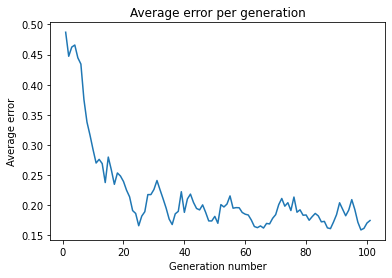

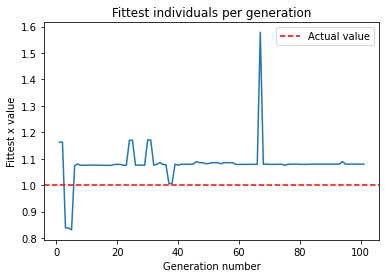


Population Size: 200
Genome size: 10
Generations amount: 100


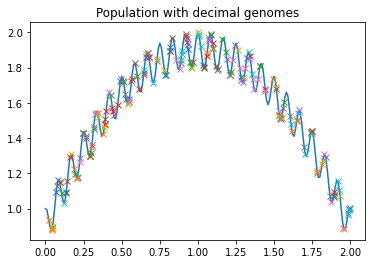

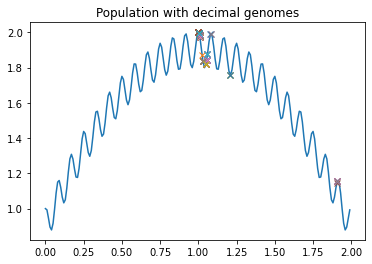

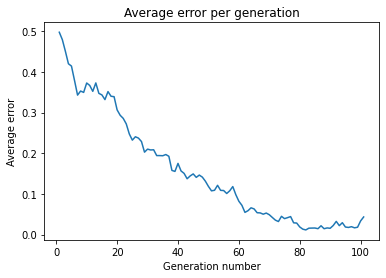

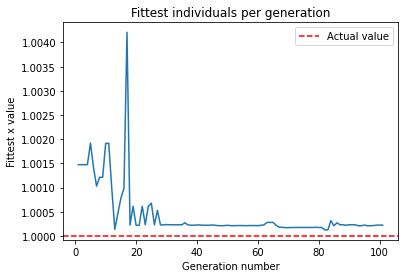


Population Size: 100
Genome size: 10
Generations amount: 300
Increased Mutability (0.01)


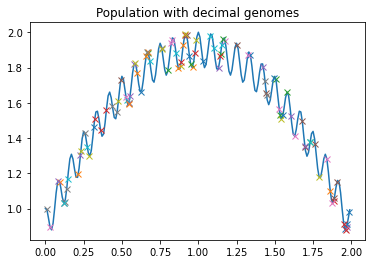

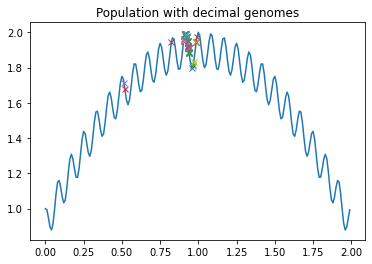

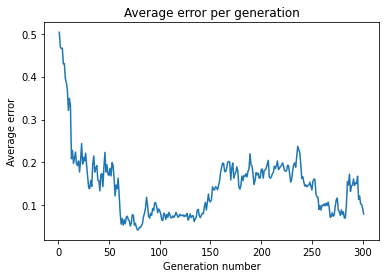

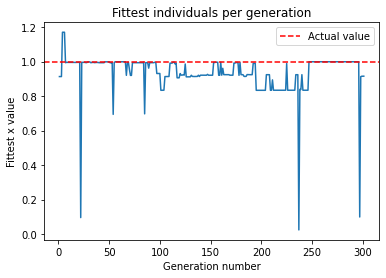


Population Size: 500
Genome size: 10
Generations amount: 100


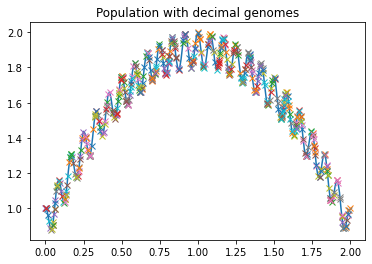

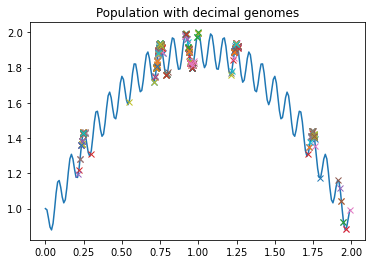

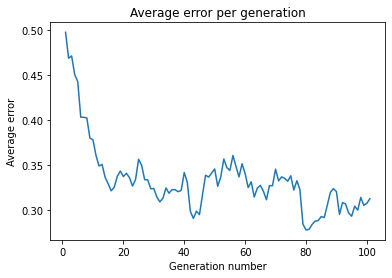

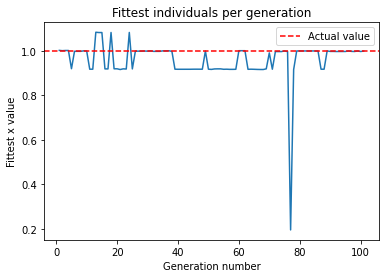


Population Size: 100
Genome size: 10
Generations amount: 300
Increased Mutability (0.005)


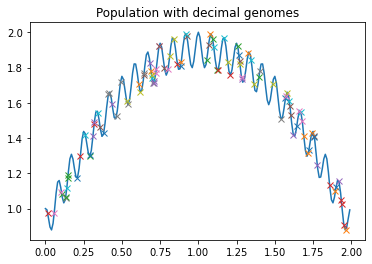

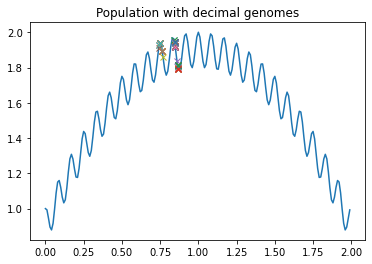

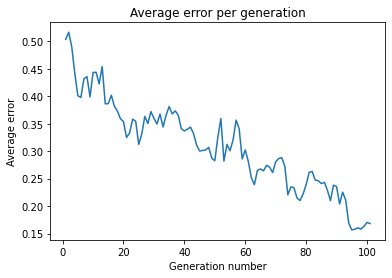

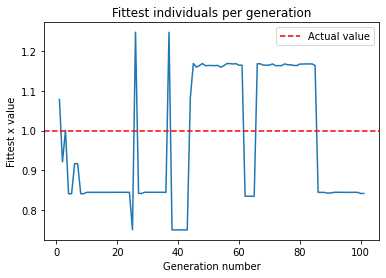


Population Size: 500
Genome size: 20
Generations amount: 100


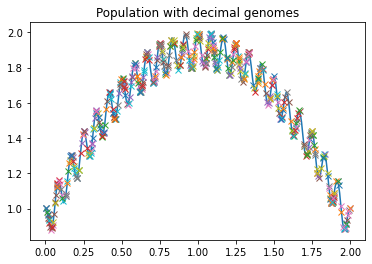

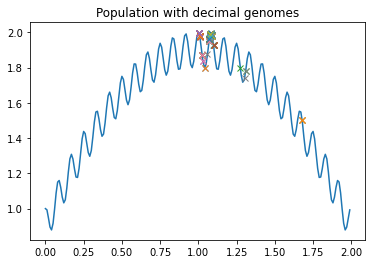

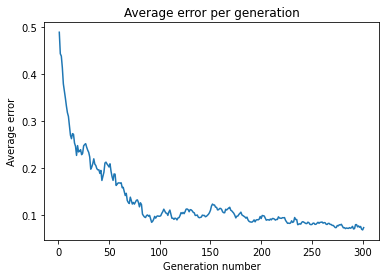

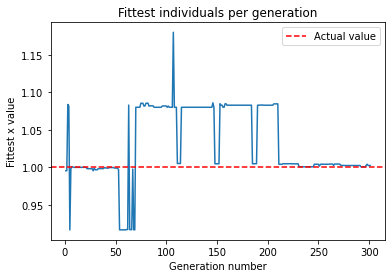

In [ ]:
f = Function(lambda x: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2)

f.set_gene_representation("decimal")
print("Population Size: 100\nGenome size: 15\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=15, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1)

f.set_gene_representation("binary")
print("Population Size: 100\nGenome size: 30\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=30, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1)

f = Function(lambda x: -(0.1+(1-x)**2-0.1*math.cos(12*math.pi*(1-x)))+2)

f.set_gene_representation("decimal")
print("Population Size: 100\nGenome size: 15\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=15, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1)

f.set_gene_representation("binary")
print("Population Size: 100\nGenome size: 30\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=30, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1)

f = Function(lambda x: -(0.1+(1-x)**2-0.1*math.cos(24*math.pi*(1-x)))+2)

f.set_gene_representation("decimal")
print("Population Size: 100\nGenome size: 15\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=15, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

f.set_gene_representation("binary")
print("Population Size: 100\nGenome size: 30\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=30, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

f.set_gene_representation("decimal")
print("Population Size: 100\nGenome size: 10\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

f.set_gene_representation("binary")
print("Population Size: 100\nGenome size: 100\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.002, 
                   genome_size=100, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

f.set_gene_representation("decimal")
print("Population Size: 100\nGenome size: 10\nGenerations amount: 100\nIncreased Mutability (0.005)")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 100\nGenome size: 10\nGenerations amount: 100\nIncreased Mutability (0.01)")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.01, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 200\nGenome size: 10\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=200, 
                   mutation_p=0.002, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 100\nGenome size: 10\nGenerations amount: 300\nIncreased Mutability (0.01)")
f.simulate_maximum(generations=300, 
                   population_size=100, 
                   mutation_p=0.01, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 500\nGenome size: 10\nGenerations amount: 100")
f.simulate_maximum(generations=100, 
                   population_size=500, 
                   mutation_p=0.002, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 100\nGenome size: 10\nGenerations amount: 300\nIncreased Mutability (0.005)")
f.simulate_maximum(generations=100, 
                   population_size=100, 
                   mutation_p=0.005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 500\nGenome size: 20\nGenerations amount: 100")
f.simulate_maximum(generations=300, 
                   population_size=500, 
                   mutation_p=0.002, 
                   genome_size=20, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

# Test 9 - Increasing population density

Population Size: 200
Genome size: 10
Generations amount: 500
Decreased mutability (0.0005)


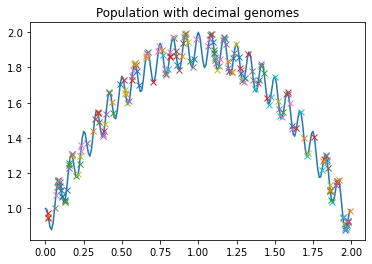

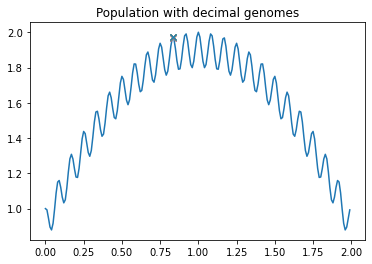

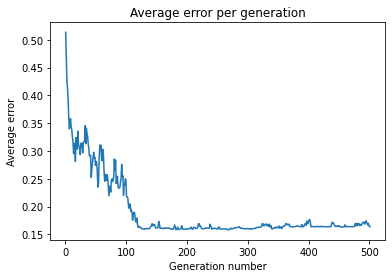

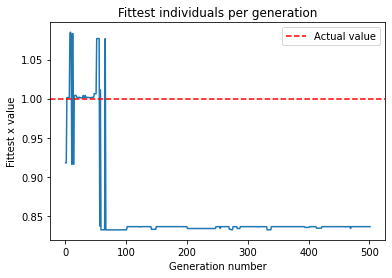


Population Size: 200
Genome size: 10
Generations amount: 500
Increased mutability (0.005)


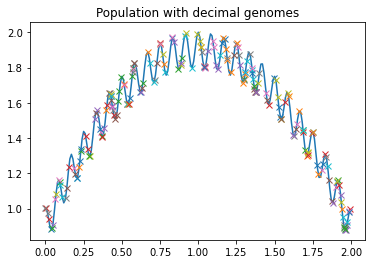

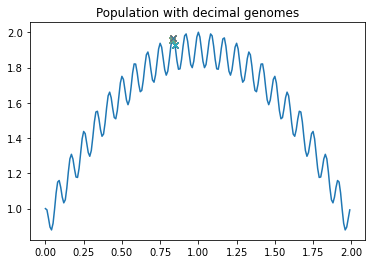

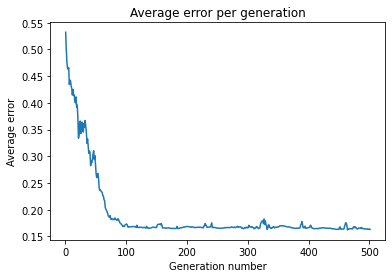

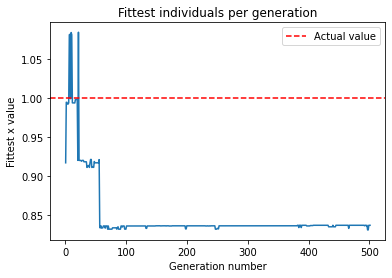


Population Size: 200
Genome size: 10
Generations amount: 500
Default mutability (0.002)


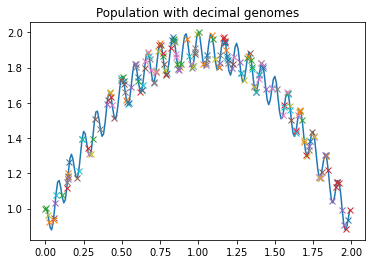

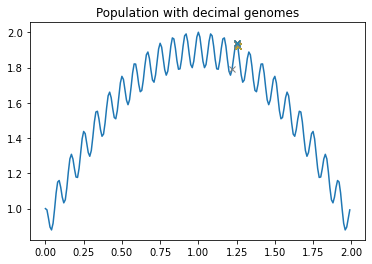

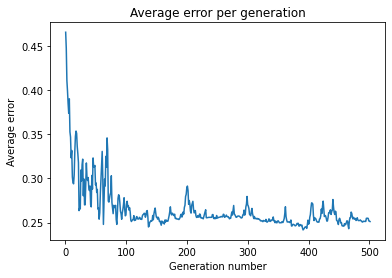

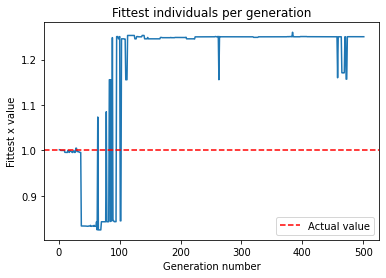


Population Size: 300
Genome size: 10
Generations amount: 500
Decreased mutability (0.0005)


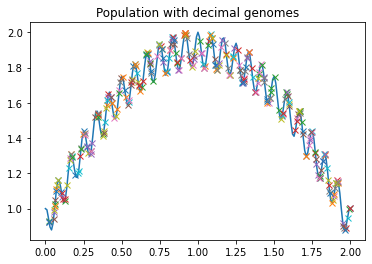

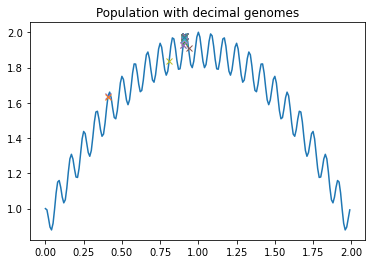

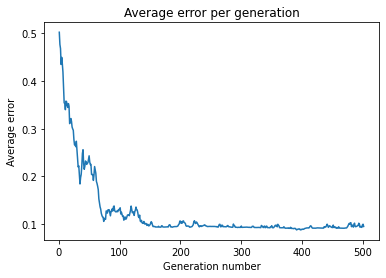

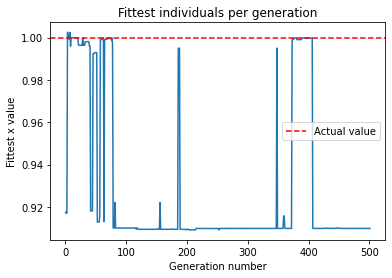


Population Size: 300
Genome size: 10
Generations amount: 500
Increased mutability (0.005)


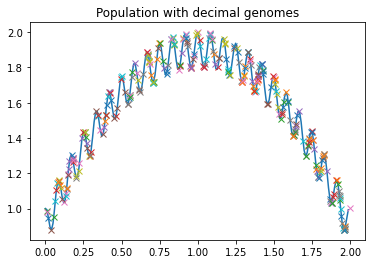

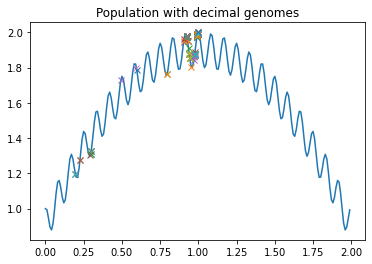

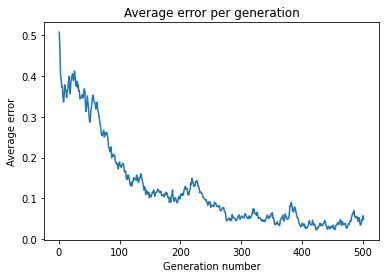

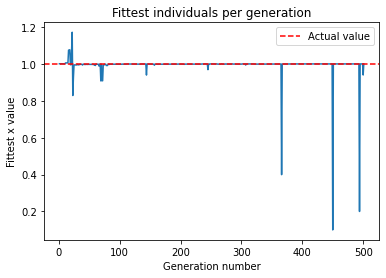


Population Size: 300
Genome size: 10
Generations amount: 500
Default mutability (0.002)


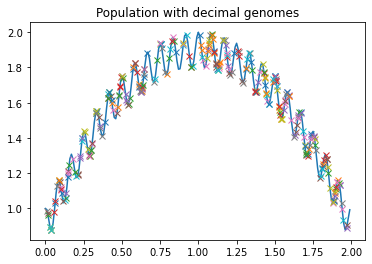

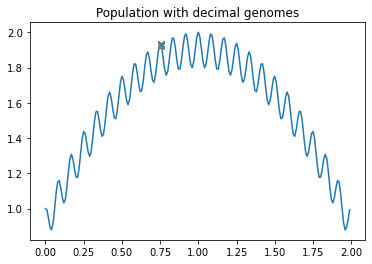

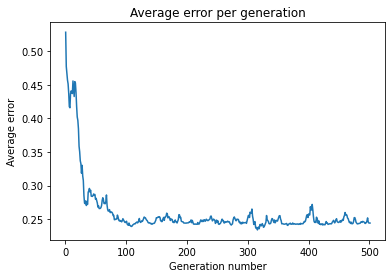

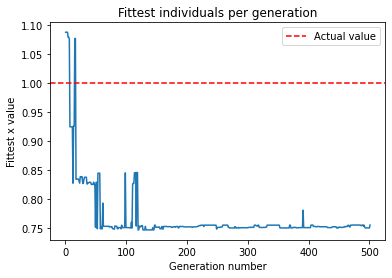


Population Size: 500
Genome size: 10
Generations amount: 500
Decreased mutability (0.0005)


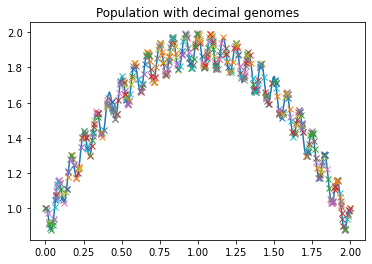

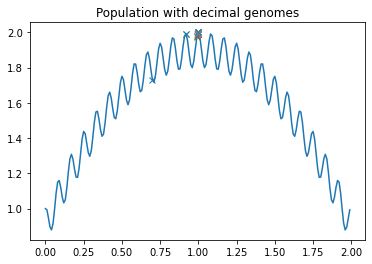

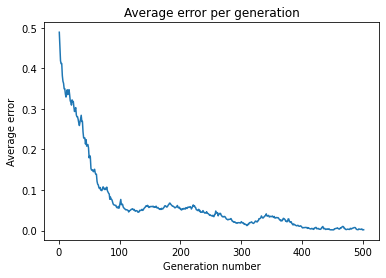

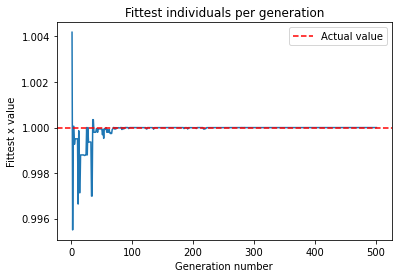


Population Size: 500
Genome size: 10
Generations amount: 500
Increased mutability (0.005)


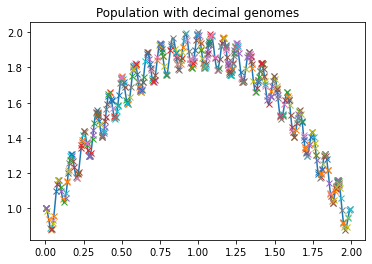

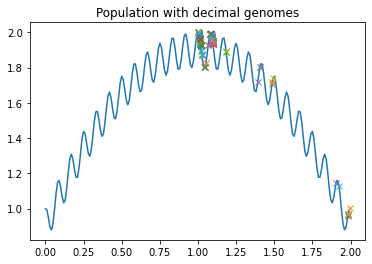

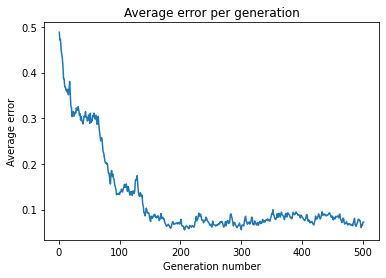

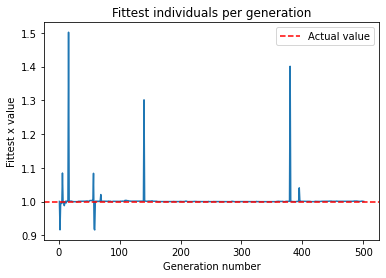


Population Size: 500
Genome size: 10
Generations amount: 500
Default mutability (0.002)


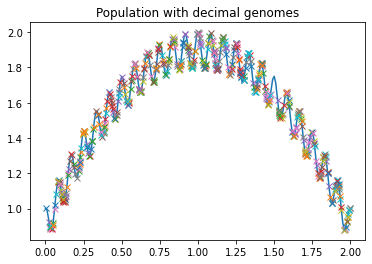

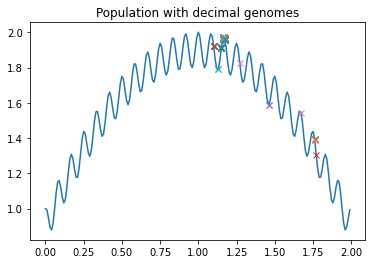

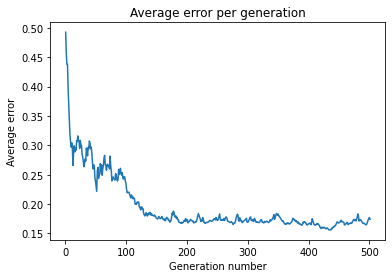

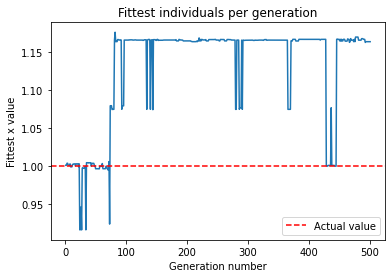

In [ ]:
f = Function(lambda x: -(0.1+(1-x)**2-0.1*math.cos(24*math.pi*(1-x)))+2)

print("Population Size: 200\nGenome size: 10\nGenerations amount: 500\nDecreased mutability (0.0005)")
f.simulate_maximum(generations=500, 
                   population_size=200, 
                   mutation_p=0.0005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 200\nGenome size: 10\nGenerations amount: 500\nIncreased mutability (0.005)")
f.simulate_maximum(generations=500, 
                   population_size=200, 
                   mutation_p=0.0005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 200\nGenome size: 10\nGenerations amount: 500\nDefault mutability (0.002)")
f.simulate_maximum(generations=500, 
                   population_size=200, 
                   mutation_p=0.002, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 300\nGenome size: 10\nGenerations amount: 500\nDecreased mutability (0.0005)")
f.simulate_maximum(generations=500, 
                   population_size=300, 
                   mutation_p=0.0005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 300\nGenome size: 10\nGenerations amount: 500\nIncreased mutability (0.005)")
f.simulate_maximum(generations=500, 
                   population_size=300, 
                   mutation_p=0.005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 300\nGenome size: 10\nGenerations amount: 500\nDefault mutability (0.002)")
f.simulate_maximum(generations=500, 
                   population_size=300, 
                   mutation_p=0.002, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 500\nGenome size: 10\nGenerations amount: 500\nDecreased mutability (0.0005)")
f.simulate_maximum(generations=500, 
                   population_size=500, 
                   mutation_p=0.0005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 500\nGenome size: 10\nGenerations amount: 500\nIncreased mutability (0.005)")
f.simulate_maximum(generations=500, 
                   population_size=500, 
                   mutation_p=0.005, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 500\nGenome size: 10\nGenerations amount: 500\nDefault mutability (0.002)")
f.simulate_maximum(generations=500, 
                   population_size=500, 
                   mutation_p=0.002, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

Population Size: 500
Genome size: 10
Generations amount: 500
Decreased mutability (0.0001)


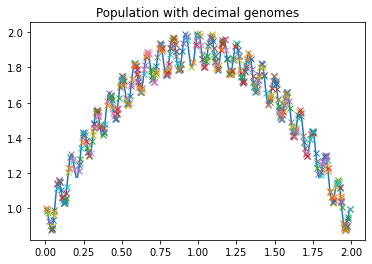

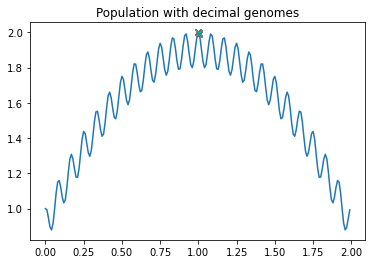

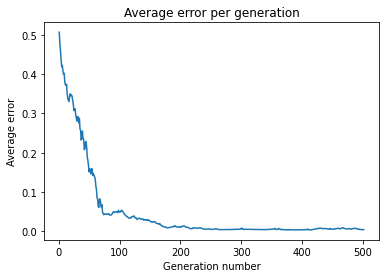

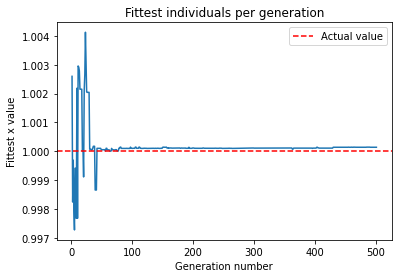


Population Size: 500
Genome size: 5
Generations amount: 500
Decreased mutability (0.0001)


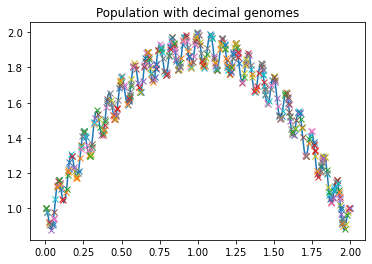

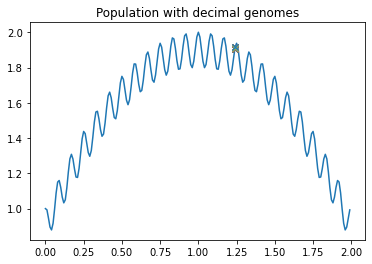

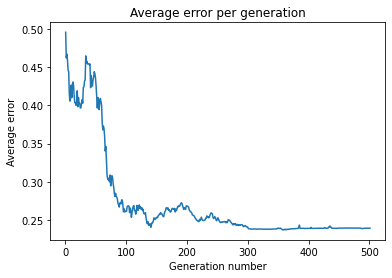

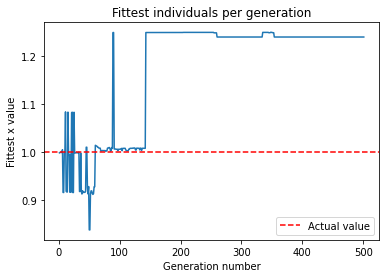

In [ ]:
print("Population Size: 500\nGenome size: 10\nGenerations amount: 500\nDecreased mutability (0.0001)")
f.simulate_maximum(generations=500, 
                   population_size=500, 
                   mutation_p=0.0001, 
                   genome_size=10, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 500\nGenome size: 5\nGenerations amount: 500\nDecreased mutability (0.0001)")
f.simulate_maximum(generations=500, 
                   population_size=500, 
                   mutation_p=0.0001, 
                   genome_size=5, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

# Test 11 - Binary genomes and high frequency functions

Genome representation was changed to: Binary.
Population Size: 100
Genome size: 500
Generations amount: 200
Decreased mutability (p=0.0001)


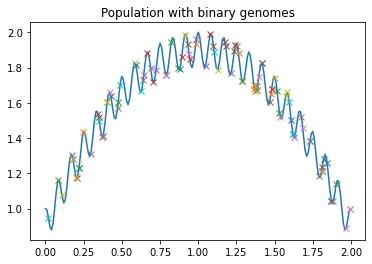

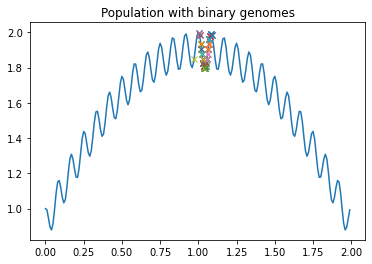

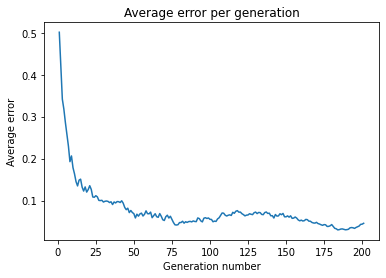

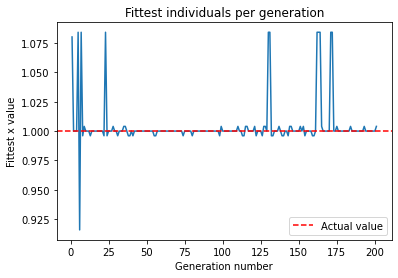


Population Size: 100
Genome size: 300
Generations amount: 200
Decreased mutability (p=0.0001)


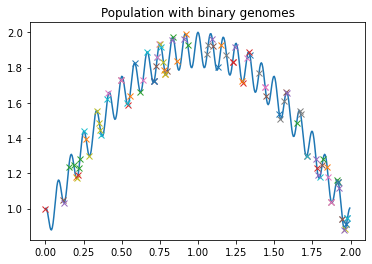

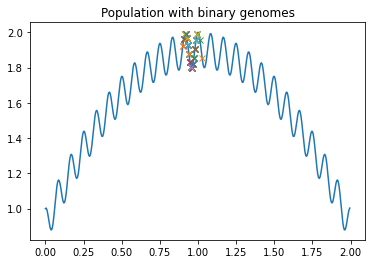

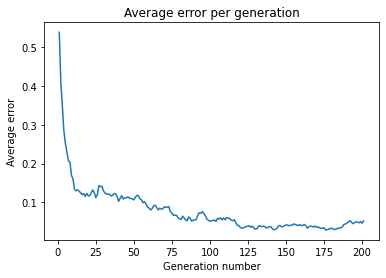

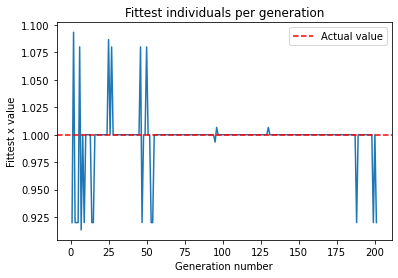


Population Size: 200
Genome size: 300
Generations amount: 200
Decreased mutability (p=0.00005)


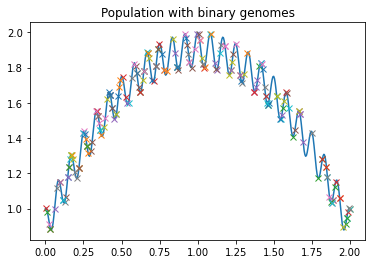

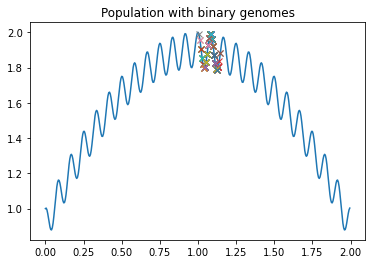

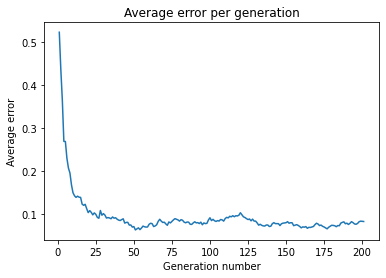

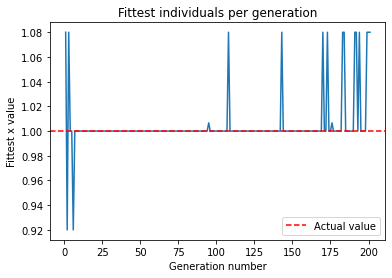


Population Size: 100
Genome size: 300
Generations amount: 200
Decreased mutability (p=0.0001)


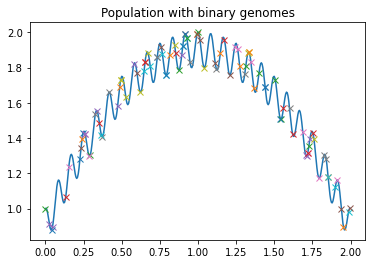

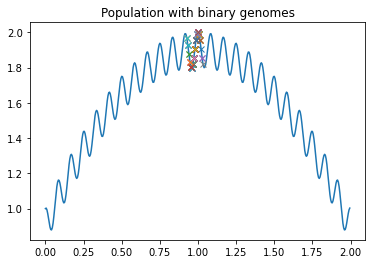

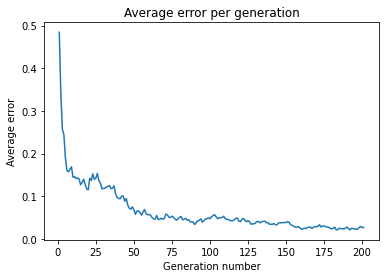

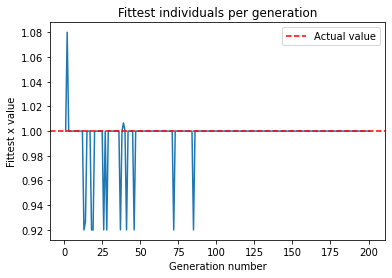

In [ ]:
f = Function(lambda x: -(0.1+(1-x)**2-0.1*math.cos(24*math.pi*(1-x)))+2)
f.set_gene_representation("binary")
print("Population Size: 100\nGenome size: 500\nGenerations amount: 200\nDecreased mutability (p=0.0001)")
f.simulate_maximum(generations=200, 
                   population_size=100, 
                   mutation_p=0.0001, 
                   genome_size=500, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.01)

print("Population Size: 100\nGenome size: 300\nGenerations amount: 200\nDecreased mutability (p=0.0001)")
f.simulate_maximum(generations=200, 
                   population_size=100, 
                   mutation_p=0.0001, 
                   genome_size=300, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.005)

print("Population Size: 200\nGenome size: 300\nGenerations amount: 200\nDecreased mutability (p=0.00005)")
f.simulate_maximum(generations=200, 
                   population_size=200, 
                   mutation_p=0.00005, 
                   genome_size=300, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.005)

print("Population Size: 100\nGenome size: 300\nGenerations amount: 200\nDecreased mutability (p=0.0001)")
f.simulate_maximum(generations=200, 
                   population_size=100, 
                   mutation_p=0.0001, 
                   genome_size=300, 
                   min_x=0, 
                   max_x=2, 
                   do_plot=True,
                   known_max=1, 
                   step=0.005)